
<font size = "5"> **Chapter 2: [Diffraction](CH2_00-Diffraction.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

# HOLZ Lines

[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM//main/Diffraction/CH2_11-HOLZ_Lines.ipynb)
 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main/Diffraction/CH2_11-HOLZ_Lines.ipynb)


part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Spring 2021

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes



## Load relevant python packages
### Check Installed Packages

In [1]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = get_distribution(package_name).version
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version

# Colab setup ------------------
if 'google.colab' in sys.modules:
    !pip install pyTEMlib -q
# pyTEMlib setup ------------------
else:
    if test_package('pyTEMlib') < '0.2021.2.5':
        print('installing pyTEMlib')
        !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

installing pyTEMlib
done


### Import numerical and plotting python packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,

and some libraries from the book
* kinematic scattering library.


In [2]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
import sys
if 'google.colab' in sys.modules:
    %pylab --no-import-all inline
else:
    %pylab --no-import-all notebook

# additional package 
import  itertools 
import scipy.constants as const

import ipywidgets as ipyw

# Import libraries from the book

# Import libraries from pyTEMlib

import pyTEMlib
import pyTEMlib.KinsCat as ks         # Kinematic sCattering Library
                             # Atomic form factors from Kirklands book

### And we use the image tool library of Quantifit
import pyTEMlib.file_tools as ft
import pyTEMlib
print(pyTEMlib.__version__)

Populating the interactive namespace from numpy and matplotlib
Using KinsCat library version  0.5  by G.Duscher
spglib not installed; Symmetry functions of spglib disabled
0.2021.02.22



## Define  crystal


In [3]:
### Please choose another crystal like: Silicon, Aluminium, GaAs , ZnO
tags = ks.structure_by_name('silicon')

## Plot the unit cell

<IPython.core.display.Javascript object>


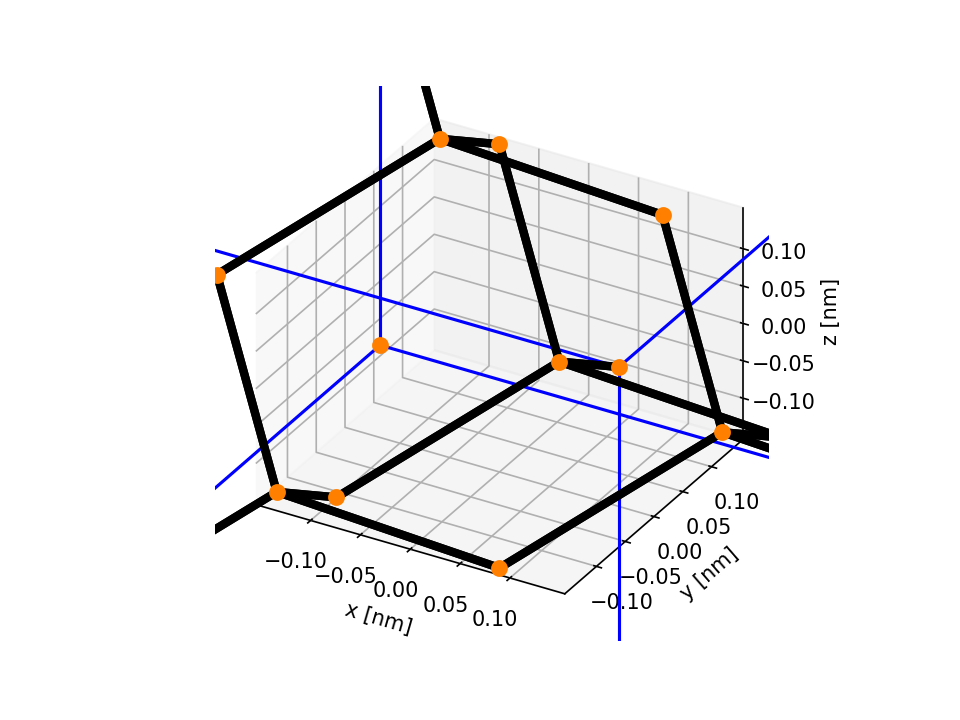

In [4]:
## Just to be sure the crystal structure is right
ks.plot_unitcell(tags)


## Parameters for Diffraction Calculation


In [5]:
tags['acceleration_voltage_V'] = 99 *1000.0 #V

tags['convergence_angle_mrad'] = 0

tags['zone_hkl'] = np.array([2,2,1])  # incident neares zone axis: defines Laue Zones!!!!
tags['mistilt']  = np.array([0,0,0])  # mistilt in degrees

tags['Sg_max'] = .1 # 1/nm  maximum allowed excitation error ; This parameter is related to the thickness
tags['hkl_max'] = 16   # Highest evaluated Miller indices


## Kinematic Scattering Calculation

In [6]:
ks.kinematic_scattering(tags, True)

reciprocal_unit_cell
[[1.764 0.    0.   ]
 [0.    1.764 0.   ]
 [0.    0.    1.764]]
The inner potential is 84619.583kV
Magnitude of incident wave vector in material 258.6 1/nm and vacuum 268.7 1/nm
The convergence angle of 0mrad = 0.00 1/nm
Rotation angles are 70.5 deg and 45.0 deg
Center of Ewald sphere  [-1.08480855e-14  0.00000000e+00  2.58582676e+02]
Of the 35936 tested reciprocal_unit_cell points, 157 have an excitation error less than 0.10 1/nm
Of the 157 possible reflection 32 are allowed.
 There are 2 allowed reflections in the zero order Laue Zone
 There are 12 allowed reflections in the first order Laue Zone
 There are 2 allowed reflections in the second order Laue Zone
 There are 16 allowed reflections in the other higher order Laue Zones
Length of zone axis vector in real space 1.7 nm
There are 0 forbidden but dynamical activated diffraction spots:
KinsCat's  "Kinematic_Scattering" finished


### Plot Selected Area Electron Diffraction Pattern

<IPython.core.display.Javascript object>


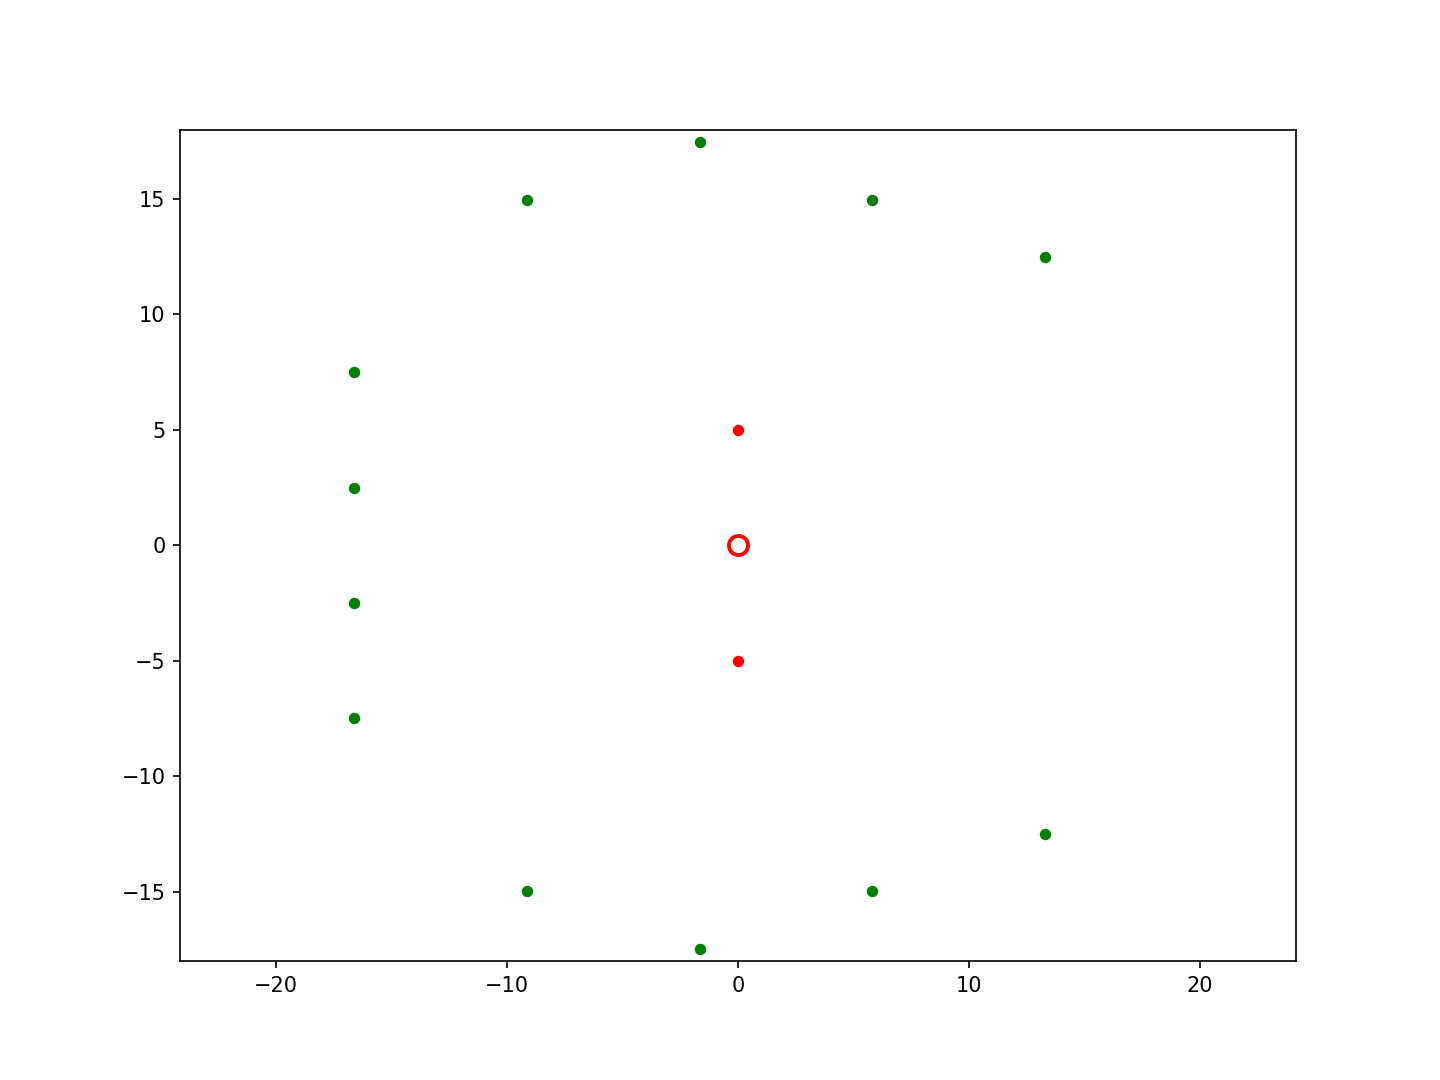

In [7]:
#####################
# Plot ZOLZ SAED Pattern #
#####################

# Get information from dictionary

#We plot only the allowed diffraction spots
points = tags['allowed']['g']
# we sort them by order of Laue zone
ZOLZ = tags['allowed']['ZOLZ']
HOLZ = tags['allowed']['HOLZ']

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
# We plot the x,y axis only; the z -direction is set to zero - this is our projection
ax.scatter(points[ZOLZ,0], points[ZOLZ,1], c='red', s=20)
ax.scatter(points[HOLZ,0], points[HOLZ,1], c='green', s=20)

# zero spot plotting
ax.scatter(0,0, c='red', s=100)
ax.scatter(0,0, c='white', s=40)

ax.axis('equal')
FOV = 18
plt.ylim(-FOV,FOV); plt.xlim(-FOV,FOV); plt.show()

<IPython.core.display.Javascript object>


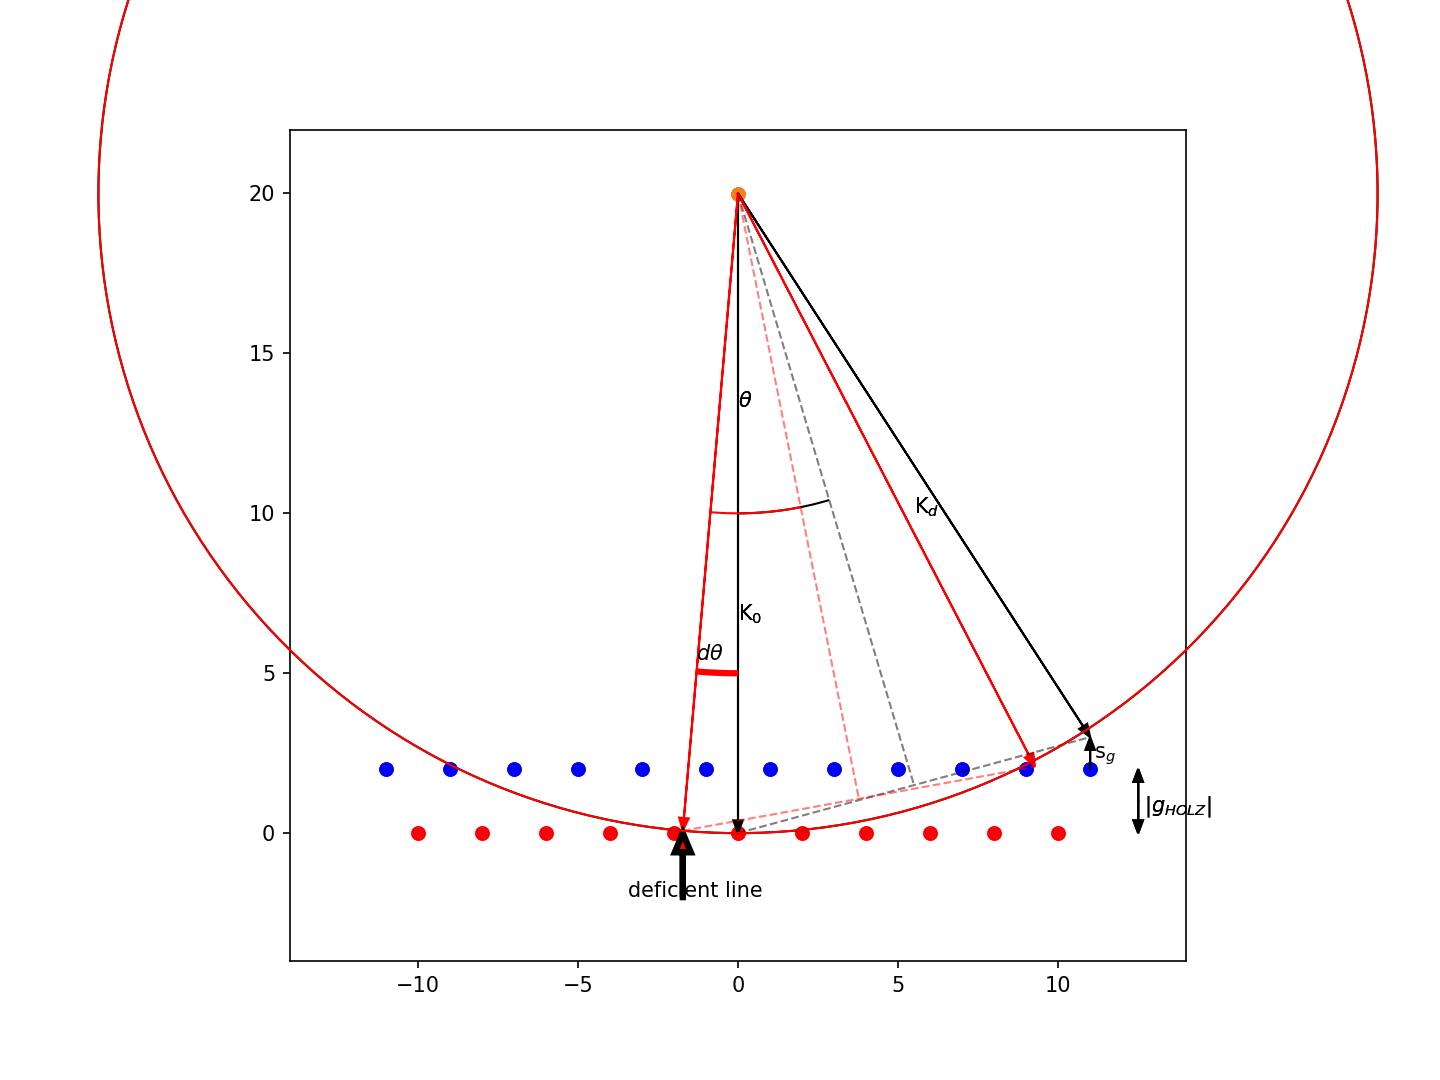

In [11]:
import pyTEMlib.animation  as animate

plt.figure()

animate.deficient_holz_line(exact_bragg=False, laue_zone=1)
#animate.deficient_holz_line(exact_bragg='True', laue_zone=1, color='blue')
animate.deficient_holz_line(exact_bragg='True', laue_zone=1, color='red', shift=True)


## HOLZ Line Construction


Position of deficient HOLZ line

### What is $d\theta$:
\begin{eqnarray*}		
    d\theta &+&(90-\theta_B)+ \varphi =  90\\
    d\theta  &=&  \theta_B -\varphi\\
    &&\\
    \sin(\theta_B) &=&|\vec{g}/2|/ |\vec{K}_0| \\
    \tan(\phi) &=& |\vec{g}_{HOLZ}|/|\vec{g}-\vec{g}_{HOLZ}|\\
    &&\\
    |\vec{g}_{deficient}| &=& 2\sin(  d\theta/ 2 )* |\vec{K}_0|\\
\end{eqnarray*}
        
        
>For exact Bragg position in ZOLZ 
>
>$d\theta = \theta_B$  then $\vec{g}_{deficient} = -\vec{g}/2   $
            
            
$d\theta = \theta - \varphi$

with:

$\sin(\theta) =\frac{|\vec{g}|/2}{|\vec{K}_0| }$

$\sin(\varphi) = \frac{|\vec{g}_{\rm HOLZ}|}{|\vec{g}|}$

Because $d\theta$ is the same as $d \varphi$ we can now calculate the deficient HOLZ lines

\begin{eqnarray*}
				\vec{K}_{Bg} &=& ( (\vec{g}-\vec{g}_{HOLZ})/ |\vec{g}-\vec{g}_{HOLZ}|*|\vec{g}_{HOLZ}| \\
				&& + \vec{K}_{0}/|\vec{K}_{0}|*|\vec{g}-\vec{g}_{HOLZ}|)\\
				\vec{K}_{Bg} &=&(\vec{g}_{ZOLZ}/|\vec{g}_{ZOLZ}|*|\vec{g}_{HOLZ}|) \\
				&+&\vec{K}_{0}/|\vec{K}_{0}|*|\vec{g}-\vec{g}_{HOLZ}|)\\
				\vec{K}_{B} &=&	\vec{K}_{bg}/|\vec{K}_{Bg}|*\sqrt{|\lambda^2-g^2/4)}\\
				\vec{K}_d &=& -(\vec{g}/2+\vec{K}_B)\\
				\vec{g}_{deficient} &=& \vec{K}_{0}-\vec{K}_{d}\\
\end{eqnarray*}

>For exact Bragg position in ZOLZ 
>$\vec{B}=\vec{K}_{0}$  then $\vec{g}_{deficient} = \vec{g}/2$
>			
>	This is our Kikuchi line equation

#Calculate angle between K0 and deficient cone vector
#For dynamic calculations K0 is replaced by Kg

dtheta = np.arcsin(g_norm_allowed/Kg/2.)-

np.arcsin(np.abs(g_allowed[:,2])/g_norm_allowed)

#calculate length of distance of deficient cone to K0 in ZOLZ plane

gd_length =2*np.sin((dtheta)/2 )*K0

#Calculate nearest point of HOLZ and Kikuchi lines

gd = g_allowed.copy()

gd[:,0] = -gd[:,0]*gd_length/g_norm_allowed

gd[:,1] = -gd[:,1]*gd_length/g_norm_allowed

gd[:,2] = 0.

###calculate and save line in Hough space coordinates (distance and theta)

slope = gd[:,0]/(gd[:,1]+1e-20)

distance = gd_length

theta = np.arctan(slope)

<IPython.core.display.Javascript object>


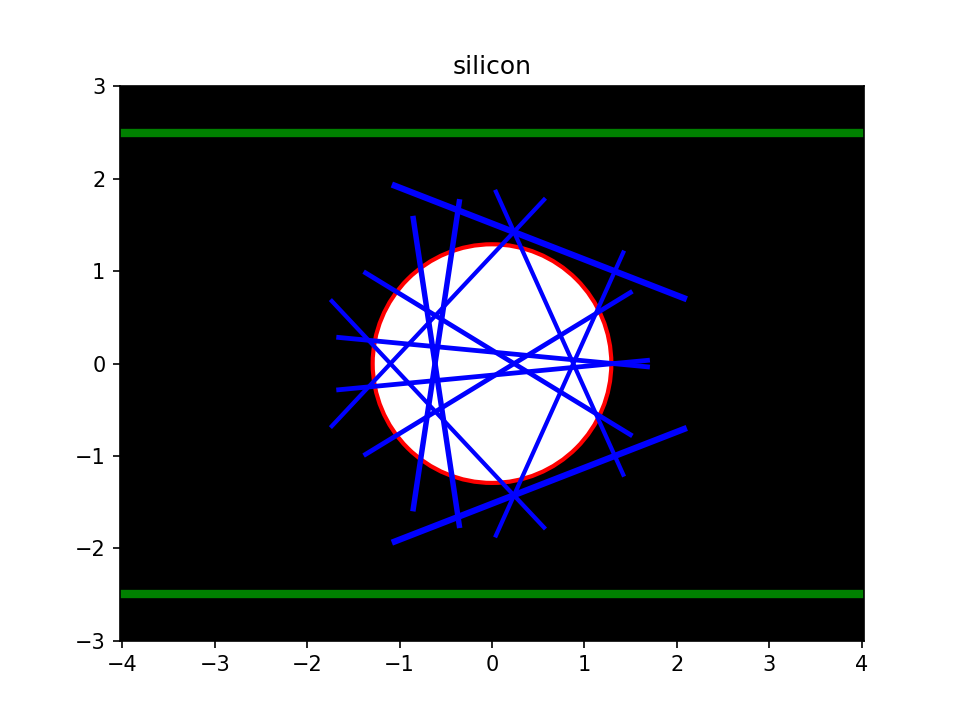

Circle(xy=(0, 0), radius=1.29137)


In [24]:
unit_cell_change_pm = 0.0

tags = ks.structure_by_name('silicon')

tags['unit_cell'] = np.identity(3)* 0.56680635+unit_cell_change_pm/1000.

tags['acceleration_voltage_V'] = 98.8*1000.0 #V

tags['zone_hkl'] = np.array([-2,2,1])  # incident neares zone axis: defines Laue Zones!!!!
tags['mistilt']  = np.array([-0.0,-0.0,-0.0])  # mistilt in degrees

tags['Sg_max'] = .1 # 1/nm  maximum allowed excitation error ; This parameter is related to the thickness
tags['hkl_max'] = 9   # Highest evaluated Miller indices

tags['convergence_angle_mrad'] = 5

ks.kinematic_scattering(tags, False)
tags['plot FOV'] = 3
ks.plotHOLZ(tags)


<IPython.core.display.Javascript object>


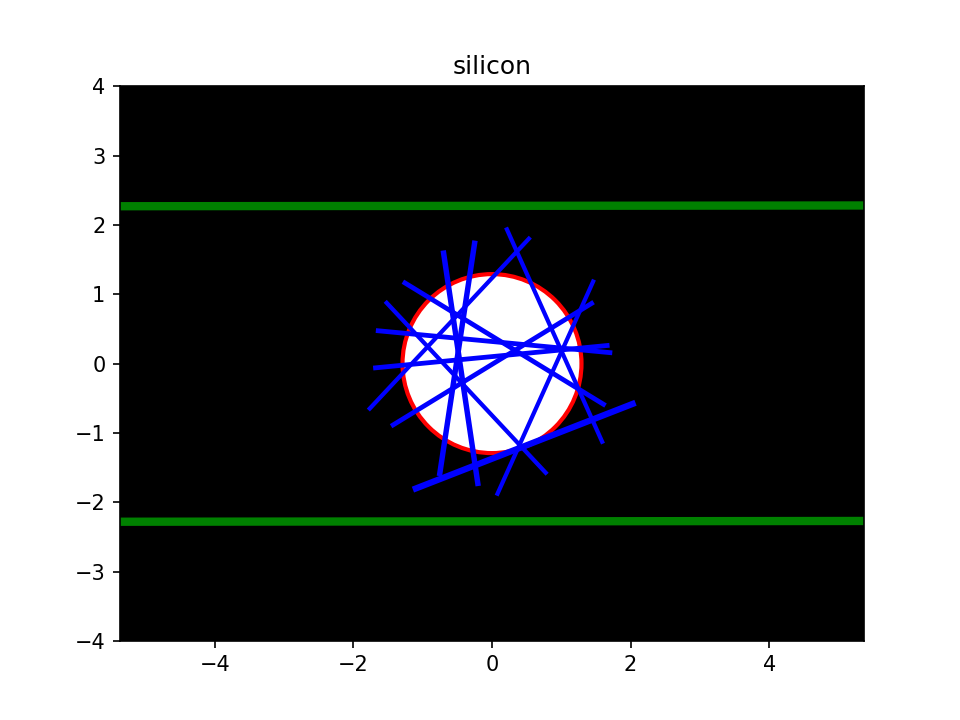

Circle(xy=(0, 0), radius=1.29137)


In [21]:
tags['plot FOV'] = 4

tags['plot_rotation'] = 0
ks.plotHOLZ(tags)

## Now everything together in a single cell

tags['convergence_angle_mrad'] = 0


<IPython.core.display.Javascript object>


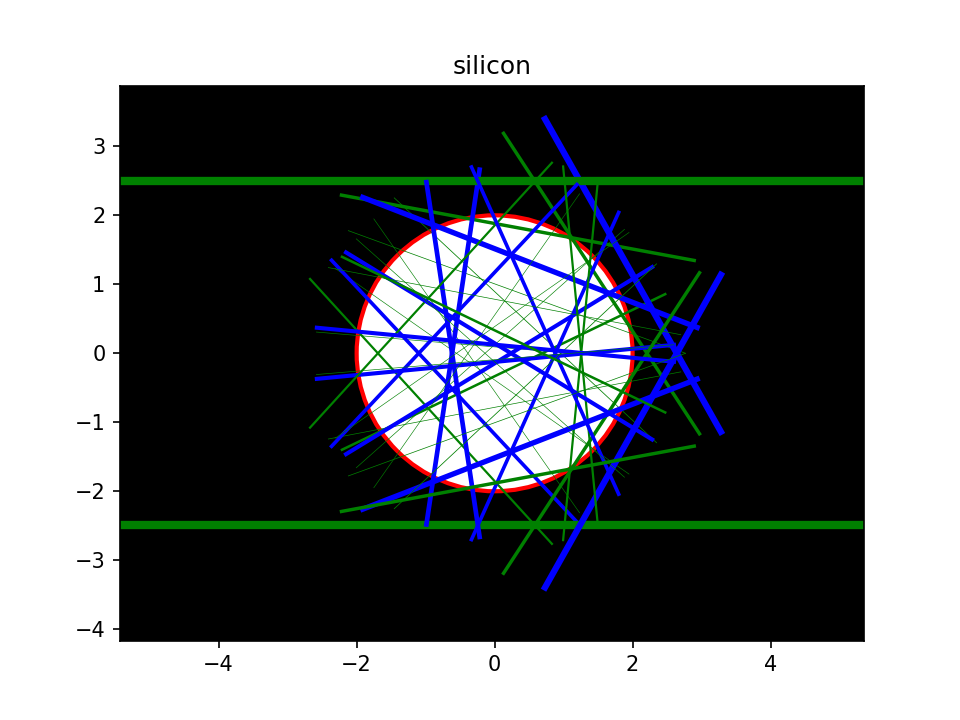

Circle(xy=(0, 0), radius=2)


In [22]:
### Please choose another crystal like: Silicon, Aluminium, GaAs , ZnO
tags = ks.structure_by_name('silicon')

tags['acceleration_voltage_V'] = 98.8*1000.0 #V

tags['zone_hkl'] = np.array([-2,2,1])  # incident neares zone axis: defines Laue Zones!!!!
tags['mistilt']  = np.array([-0.0,-0.0,-0.0])  # mistilt in degrees

tags['Sg_max'] = .2 # 1/nm  maximum allowed excitation error ; This parameter is related to the thickness
tags['hkl_max'] = 14   # Highest evaluated Miller indices

# Calculation
ks.kinematic_scattering(tags, False)

tags['plot FOV'] = 40

ks.plotCBED(tags);


## Now for graphite and low acceleration voltages.
Change the acceleration voltage and see what happens.

tags['convergence_angle_mrad'] = 0


<IPython.core.display.Javascript object>


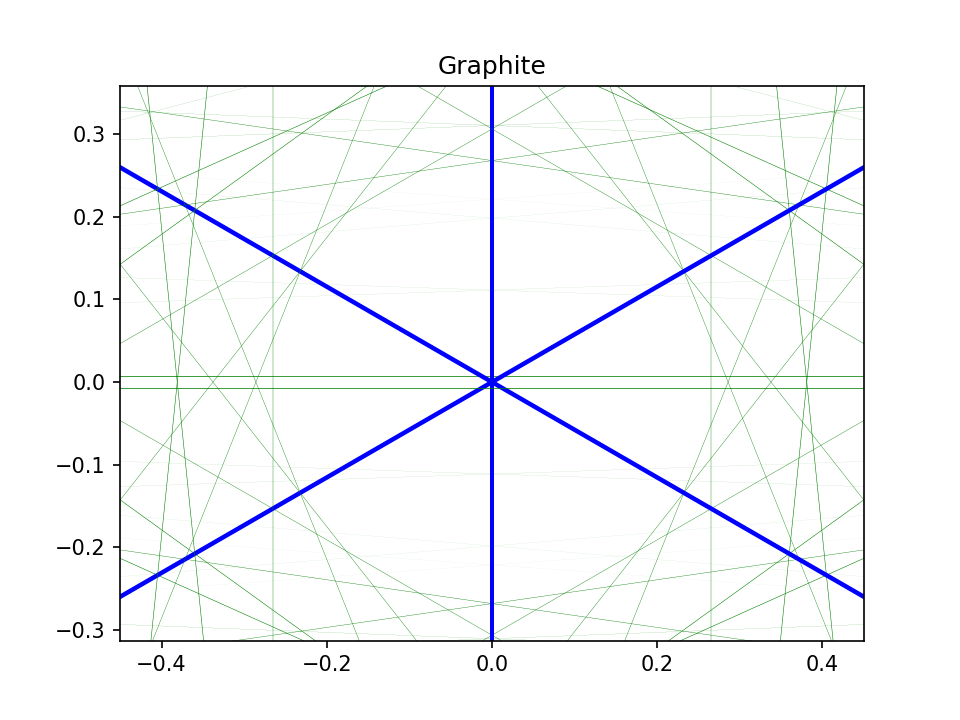

Circle(xy=(0, 0), radius=2)


In [30]:
### Please choose another crystal like: Silicon, Aluminium, GaAs , ZnO
tags = ks.structure_by_name('graphite')

tags['acceleration_voltage_V'] = 50.678*1000.0 #V
#tags['acceleration_voltage_V'] = 100.*1000.0 #V


tags['zone_hkl'] = np.array([0,0,1])  # incident neares zone axis: defines Laue Zones!!!!
tags['mistilt']  = np.array([-0.0,-0.0,-0.0])  # mistilt in degrees

tags['Sg_max'] = .2 # 1/nm  maximum allowed excitation error ; This parameter isrelated to the thickness
tags['hkl_max'] = 9   # Highest evaluated Miller indices

# Calculation
ks.kinematic_scattering(tags, False)

tags['plot FOV'] = 2

ks.plotCBED(tags);


## Navigation

- <font size = "3">  **Back: [Kikuchi Lines](CH2_10-Kikuchi_Lines.ipynb)** </font>
- <font size = "3">  **Next: [Lattice Determination with HOLZ](CH2_12-HOLZ_Example.ipynb)** </font>
- <font size = "3">  **Chapter 2: [Diffraction](CH2_00-Diffraction.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>
